In [2]:
#Topic: Environment and Energy (Maven Analytics' dataset: Apple Emissions)
import pandas as pd
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

In [3]:
#reading datasets
carbon_footprint_by_product = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/carbon_footprint_by_product.csv')
greenhouse_gas_emissions = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/greenhouse_gas_emissions.csv')
normalizing_factors = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/normalizing_factors.csv')
#csv on what variables mean (readme basically):
variable_understanding = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/data_dictionary.csv')

In [4]:
#Table describing variables for each of the three tables
variable_understanding

,Table,Field,Description
0,Greenhouse gas emissions,Fiscal Year,Apple's fiscal calendar starts on the last Sun...
1,Greenhouse gas emissions,Category,Emissions are divided into two categories: cor...
2,Greenhouse gas emissions,Type,There are two types of emissions data included...
3,Greenhouse gas emissions,Scope,There are three scopes: direct scope 1 emissio...
4,Greenhouse gas emissions,Description,The source of the greenhouse gas emissions
5,Greenhouse gas emissions,Emissions,Greenhouse gas emissions (metric tons CO2e)
6,Carbon footprint by product,Release Year,Year the product was released
7,Carbon footprint by product,Product,Product name
8,Carbon footprint by product,Baseline Storage,Lowest storage option
9,Carbon footprint by product,Carbon Footprint,Greenhouse gas emissions from the product lige...


In [5]:
carbon_footprint_by_product

,Release Year,Product,Baseline Storage,Carbon Footprint
0,2023,iPhone 15,128,56
1,2022,iPhone 14,128,61
2,2021,iPhone 13,128,64
3,2020,iPhone 12,64,70
4,2019,iPhone 11,64,72
5,2018,iPhone Xs,64,70
6,2017,iPhone X,64,79
7,2017,iPhone 8,64,57
8,2016,iPhone 7,32,56
9,2015,iPhone 6s,32,54


In [6]:
greenhouse_gas_emissions

,Fiscal Year,Category,Type,Scope,Description,Emissions
0,2022,Corporate emissions,Gross emissions,Scope 1,"Natural gas, diesel, propane",39700.0
1,2022,Corporate emissions,Gross emissions,Scope 1,Fleet vehicles,12600.0
2,2022,Corporate emissions,Gross emissions,Scope 1,Other (R&D processes & refrigerant leaks),2900.0
3,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),Electricity,0.0
4,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),"Steam, heating, and cooling",3000.0
...,...,...,...,...,...,...
131,2015,Product life cycle emissions,Gross emissions,Scope 3,Manufacturing (purchased goods and services),29600000.0
132,2015,Product life cycle emissions,Gross emissions,Scope 3,Product transportation (upstream and downstream),1300000.0
133,2015,Product life cycle emissions,Gross emissions,Scope 3,Product use (use of sold products),6600000.0
134,2015,Product life cycle emissions,Gross emissions,Scope 3,End-of-life processing,500000.0


In [7]:
normalizing_factors

,Fiscal Year,Revenue,Market Capitalization,Employees
0,2022,394328,2490,164000
1,2021,365817,2450,154000
2,2020,274515,1720,147000
3,2019,260174,1090,137000
4,2018,265595,830,132000
5,2017,229234,740,123000
6,2016,215639,600,116000
7,2015,233715,580,110000


In [8]:
#Question: How do emissions relate to revenue by year? (will have to group fiscal year 
#in greenhouse gas table and get sum of emissions) ***Better: is there a CORRELATION between emissions produced by Apple and revenue


#could do a scatterplot based on that!
#could maybe even do a graph where y is years and shows graph trends (like small multiples charts)

# Y:revenue, x:emissions, z:MARKET CAPITALIZATION (more money the company is worth, the more attention it gets- leads to wanting to obe greener??? carbon footprint, emission type (category) = 
#could make that a dummy variable for corporate emissions = 1

In [9]:
#merge greenhouse_gas_emissions df and normalizing_factors df:
merged_df = pd.merge(greenhouse_gas_emissions, normalizing_factors, on = 'Fiscal Year')
merged_df

,Fiscal Year,Category,Type,Scope,Description,Emissions,Revenue,Market Capitalization,Employees
0,2022,Corporate emissions,Gross emissions,Scope 1,"Natural gas, diesel, propane",39700.0,394328,2490,164000
1,2022,Corporate emissions,Gross emissions,Scope 1,Fleet vehicles,12600.0,394328,2490,164000
2,2022,Corporate emissions,Gross emissions,Scope 1,Other (R&D processes & refrigerant leaks),2900.0,394328,2490,164000
3,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),Electricity,0.0,394328,2490,164000
4,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),"Steam, heating, and cooling",3000.0,394328,2490,164000
...,...,...,...,...,...,...,...,...,...
131,2015,Product life cycle emissions,Gross emissions,Scope 3,Manufacturing (purchased goods and services),29600000.0,233715,580,110000
132,2015,Product life cycle emissions,Gross emissions,Scope 3,Product transportation (upstream and downstream),1300000.0,233715,580,110000
133,2015,Product life cycle emissions,Gross emissions,Scope 3,Product use (use of sold products),6600000.0,233715,580,110000
134,2015,Product life cycle emissions,Gross emissions,Scope 3,End-of-life processing,500000.0,233715,580,110000


In [10]:
year_emissions_revenue = merged_df[['Fiscal Year','Emissions','Revenue']]
year_emissions_revenue

,Fiscal Year,Emissions,Revenue
0,2022,39700.0,394328
1,2022,12600.0,394328
2,2022,2900.0,394328
3,2022,0.0,394328
4,2022,3000.0,394328
...,...,...,...
131,2015,29600000.0,233715
132,2015,1300000.0,233715
133,2015,6600000.0,233715
134,2015,500000.0,233715


In [11]:
#simply taking a look at the scatterplot...then regression...then will add in possible omitted variables
year_revenue_emissions = year_emissions_revenue.groupby(by = ['Fiscal Year', "Revenue"], dropna = True)['Emissions'].sum().reset_index()
year_revenue_emissions

,Fiscal Year,Revenue,Emissions
0,2015,233715,38383470.0
1,2016,215639,29579370.0
2,2017,229234,27416300.0
3,2018,265595,25136170.0
4,2019,260174,25033730.0
5,2020,274515,22524440.0
6,2021,365817,22519400.0
7,2022,394328,20279900.0


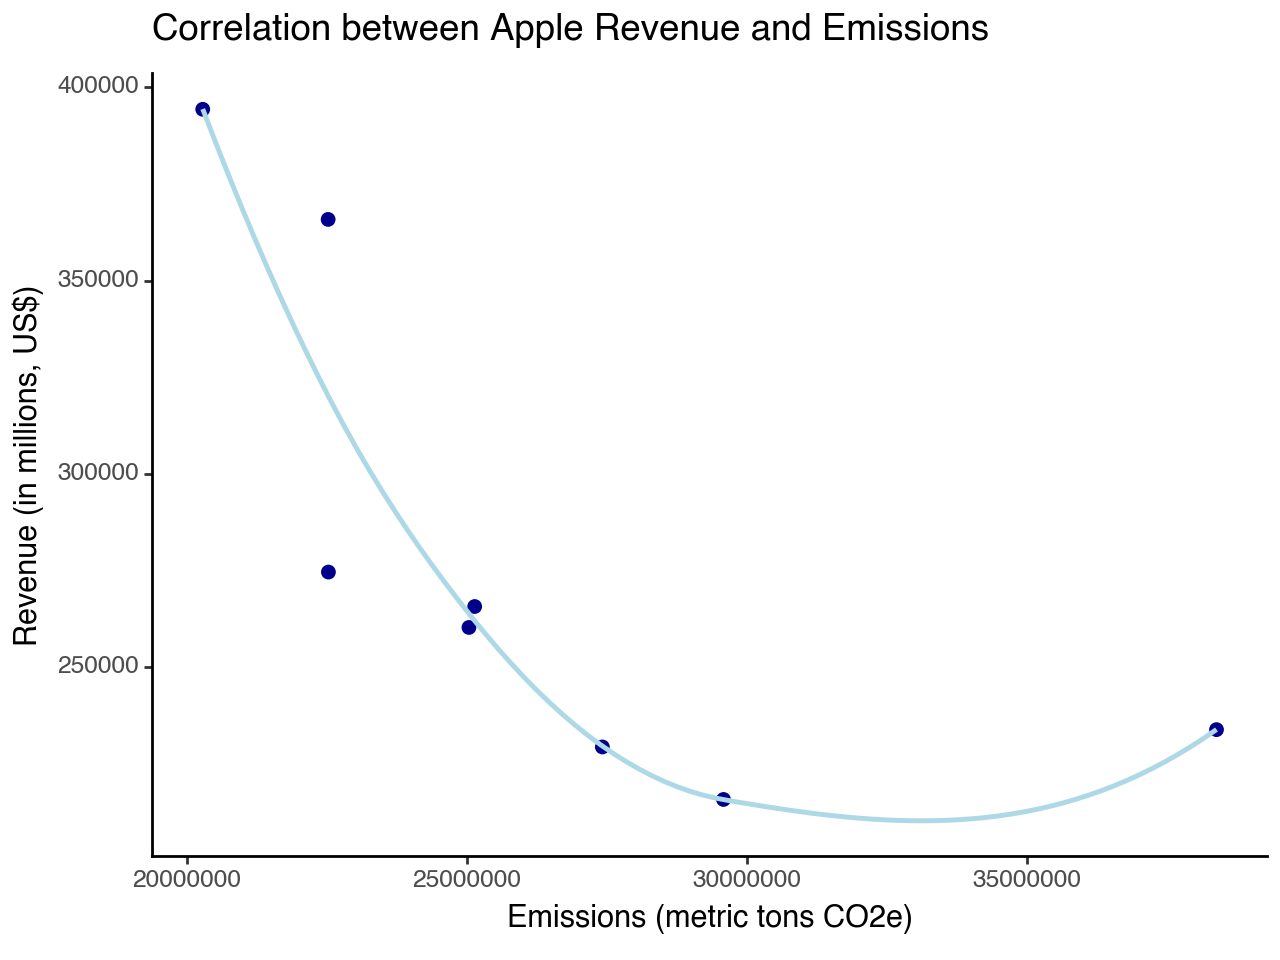

<Figure Size: (640 x 480)>

In [12]:
#Scatter Plot- fiscal year
(ggplot(year_revenue_emissions, aes(x = 'Emissions', y = 'Revenue')) +
  geom_point(size = 2, color = 'darkblue') +
  stat_smooth(method='loess', se=False, color='lightblue')+
  theme_classic() + labs (x = 'Emissions (metric tons CO2e)', y = 'Revenue (in millions, US$)', 
                          title = 'Correlation between Apple Revenue and Emissions'))
#looks like a quadratic (positive relationship between revenue and emissions and negative correlation)???
#light blue line shows the general trend

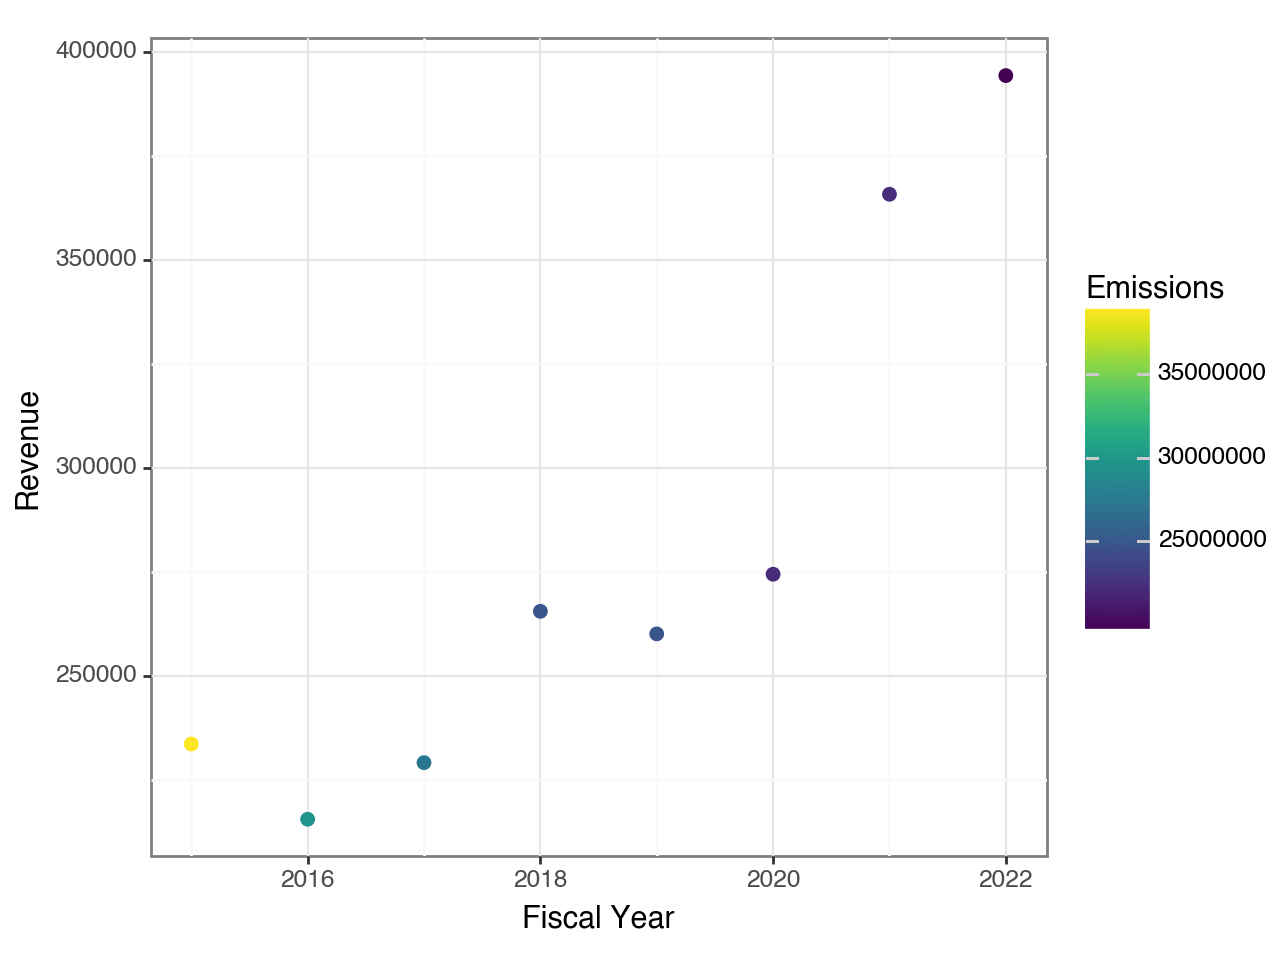

<Figure Size: (640 x 480)>

In [13]:
(ggplot(year_revenue_emissions, aes(x = 'Fiscal Year', y = 'Revenue', color = 'Emissions')) 
+ geom_point(size = 2)
+ theme_bw()
)
###ADD LABS (titles)
#as fiscal year increases, revenue increases, however emissions decrease

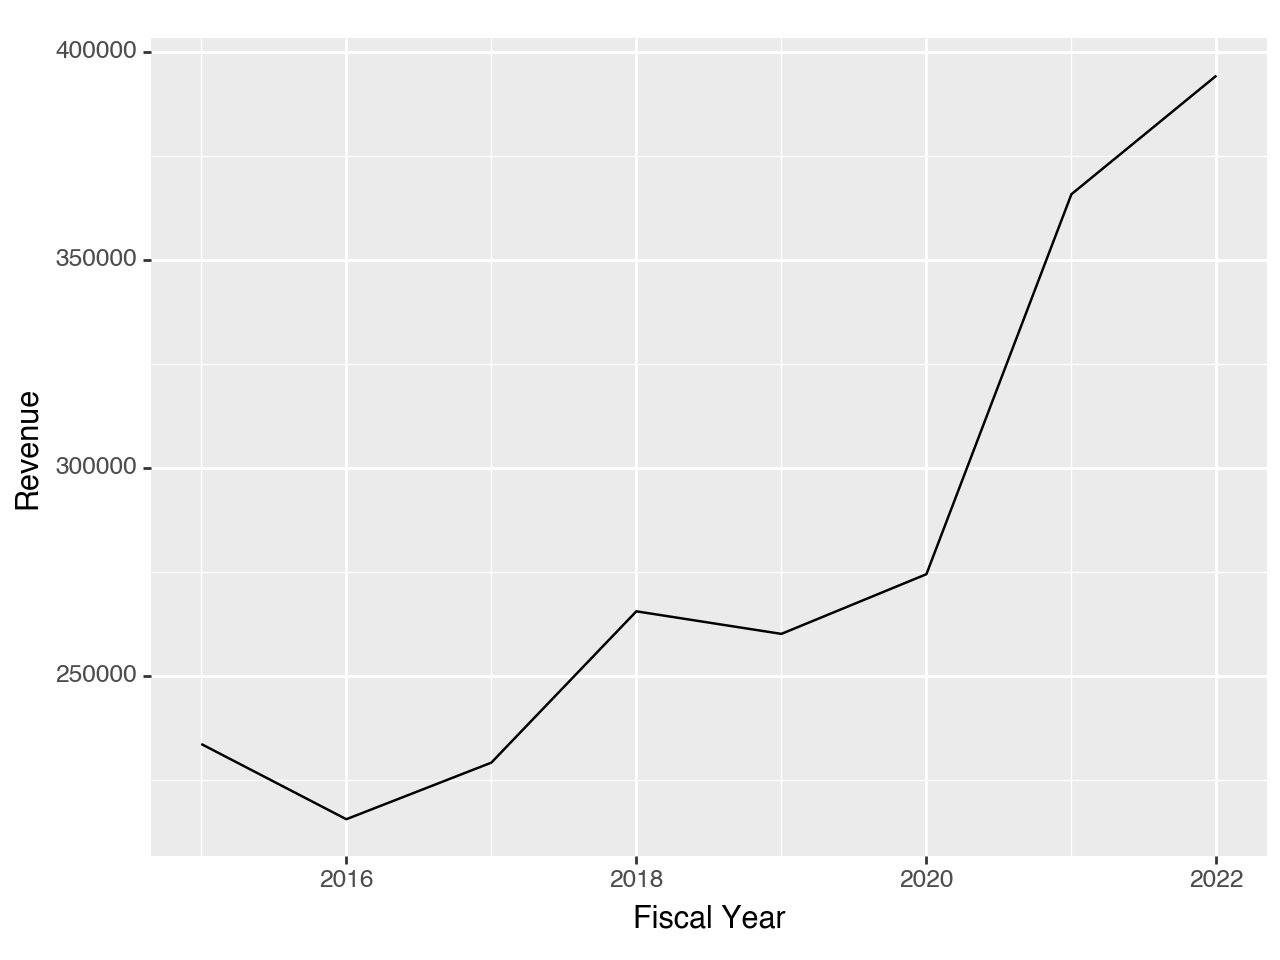

<Figure Size: (640 x 480)>

In [19]:
#could do line graph to show time series (x = years, y = Emissions/revenue, line = emissions/revenue)
#this doesn't do what i wanted: (wanted to add another emissions line)
(ggplot(merged_df, aes (x = 'Fiscal Year', y = 'Revenue')) + geom_line())